# Part I - PISA Dataset Exploration
## by Faisal Khan

## Introduction
> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

## Preliminary Wrangling

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Building Base

### Some important helper functions

In [42]:
from re import sub
def snake_case(s):
  return '_'.join(
    sub('([A-Z][a-z]+)', r' \1',
    sub('([A-Z]+)', r' \1',
    s.replace('-', ' '))).split()).upper()

In [43]:
pisadict = pd.read_csv('pisadict2012.csv', encoding='latin-1')
columns = {}
for i in range(len(pisadict)):
    columns[(pisadict.iloc[i, 0])] = snake_case(pisadict.iloc[i, 1])

In [44]:
columns

{'STIDSTD': 'STUDENT_ID',
 'CNT': 'COUNTRY',
 'OECD': 'OECD',
 'ST04Q01': 'GENDER',
 'SCHOOLID': 'SCHOOL_ID',
 'ST06Q01': 'EDUCATION_START_AGE',
 'EC06Q01': 'LANGUAGE_START_AGE',
 'IMMIG': 'IMMIGRATION_STATUS',
 'CULTDIST': 'CULTURAL_DISTANCE',
 'ST05Q01': 'PRESCHOOL',
 'HEDRES': 'HOME_EDUCATIONAL_RESOURCES',
 'PV1MATH': 'PLAUSIBLE_VALUE_1_IN_MATHEMATICS',
 'PV2MATH': 'PLAUSIBLE_VALUE_2_IN_MATHEMATICS',
 'PV3MATH': 'PLAUSIBLE_VALUE_3_IN_MATHEMATICS',
 'PV4MATH': 'PLAUSIBLE_VALUE_4_IN_MATHEMATICS',
 'PV5MATH': 'PLAUSIBLE_VALUE_5_IN_MATHEMATICS',
 'PV1READ': 'PLAUSIBLE_VALUE_1_IN_READING',
 'PV2READ': 'PLAUSIBLE_VALUE_2_IN_READING',
 'PV3READ': 'PLAUSIBLE_VALUE_3_IN_READING',
 'PV4READ': 'PLAUSIBLE_VALUE_4_IN_READING',
 'PV5READ': 'PLAUSIBLE_VALUE_5_IN_READING',
 'PV1SCIE': 'PLAUSIBLE_VALUE_1_IN_SCIENCE',
 'PV2SCIE': 'PLAUSIBLE_VALUE_2_IN_SCIENCE',
 'PV3SCIE': 'PLAUSIBLE_VALUE_3_IN_SCIENCE',
 'PV4SCIE': 'PLAUSIBLE_VALUE_4_IN_SCIENCE',
 'PV5SCIE': 'PLAUSIBLE_VALUE_5_IN_SCIENCE',
 'HISCED'

In [45]:
df = pd.read_csv('pisa2012.csv', encoding='latin-1', usecols=columns.keys())
# Renaming Columns
df.rename(columns=columns, inplace=True)
# Freeing up memory
del pisadict

In [46]:
df.sample(10)

,COUNTRY,OECD,SCHOOL_ID,STUDENT_ID,GENDER,PRESCHOOL,EDUCATION_START_AGE,DESKTOP_COMPUTER_AT_HOME,PORTABLE_LAPTOP_AT_HOME,TABLET_COMPUTER_AT_HOME,...,PLAUSIBLE_VALUE_1_IN_READING,PLAUSIBLE_VALUE_2_IN_READING,PLAUSIBLE_VALUE_3_IN_READING,PLAUSIBLE_VALUE_4_IN_READING,PLAUSIBLE_VALUE_5_IN_READING,PLAUSIBLE_VALUE_1_IN_SCIENCE,PLAUSIBLE_VALUE_2_IN_SCIENCE,PLAUSIBLE_VALUE_3_IN_SCIENCE,PLAUSIBLE_VALUE_4_IN_SCIENCE,PLAUSIBLE_VALUE_5_IN_SCIENCE
350445,Montenegro,Non-OECD,12,937,Male,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,275.0489,329.5812,279.8606,309.5325,325.5714,358.2059,347.0160,297.5942,319.0414,395.5054
226094,Indonesia,Non-OECD,177,4706,Female,"Yes, for one year or less",7.0,NaN,NaN,NaN,...,444.1027,344.8140,336.0766,336.8709,365.4660,388.6050,331.7232,353.1705,289.7613,344.7781
59718,Brazil,Non-OECD,205,4453,Male,"Yes, for one year or less",13.0,NaN,NaN,NaN,...,339.8461,306.1644,311.7780,337.4402,301.3527,323.3308,300.0186,293.4912,329.8583,308.4110
362629,Netherlands,OECD,128,3180,Male,"Yes, for more than one year",6.0,"Yes, and I use it","Yes, and I use it",No,...,443.4574,396.1426,376.0940,364.8667,396.9446,464.7893,448.9370,379.9329,442.4095,435.8821
303037,Luxembourg,OECD,16,2234,Male,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,404.0819,508.3347,368.7963,502.7211,468.2375,415.6471,484.6512,418.4446,462.2715,439.8918
10006,United Arab Emirates,Non-OECD,207,5264,Male,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,567.1173,501.3578,512.5850,539.0492,527.0200,578.6460,599.1608,596.3633,656.9750,556.2663
84514,Canada,OECD,410,10045,Male,"Yes, for one year or less",5.0,NaN,NaN,NaN,...,603.0444,593.4211,557.3336,591.0153,593.4211,649.4219,656.8818,631.7046,609.3249,609.3249
201376,United Kingdom,OECD,491,12260,Male,"Yes, for more than one year",5.0,NaN,NaN,NaN,...,499.5935,502.8013,493.1780,456.2885,426.6165,546.1954,550.8579,562.9802,496.7736,515.4233
124442,Costa Rica,Non-OECD,53,1271,Male,NaN,NaN,NaN,NaN,NaN,...,473.0491,437.7636,453.8025,418.5169,466.6336,392.3349,477.1913,375.5502,386.7400,419.3771
8916,United Arab Emirates,Non-OECD,165,4174,Male,"Yes, for one year or less",NaN,NaN,NaN,NaN,...,422.6068,466.7138,398.5484,477.1391,442.6554,468.7990,500.5035,448.2842,476.2589,494.9086


In [47]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(485490, 46)
COUNTRY                                          object
OECD                                             object
SCHOOL_ID                                         int64
STUDENT_ID                                        int64
GENDER                                           object
PRESCHOOL                                        object
EDUCATION_START_AGE                             float64
DESKTOP_COMPUTER_AT_HOME                         object
PORTABLE_LAPTOP_AT_HOME                          object
TABLET_COMPUTER_AT_HOME                          object
INTERNET_CONNECTION_AT_HOME                      object
VIDEO_GAMES_CONSOLE_AT_HOME                      object
CELL_PHONE_W/O_INTERNET_AT_HOME                  object
CELL_PHONE_WITH_INTERNET_AT_HOME                 object
LANGUAGE_START_AGE                               object
FATHER_SQ_ISEI                                  float64
MOTHER_SQ_ISEI                                  float64
CULTURAL_DISTANCE                  

In [48]:
df.duplicated().sum()


0

In [49]:
df.COUNTRY.nunique()

68

In [50]:
df.COUNTRY.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [51]:
# make a copy of the dataset to keep the original one intact.
df_clean = df.copy()

In [52]:
df_clean.COUNTRY.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

Since when are Florida, Connecticut and Massachusetts Countries 😄? There also exists an entry for United States of America, and an entry for a Russian City (Perm) Let's quickly fix that

In [53]:
df_clean.loc[df['COUNTRY'] == 'United States of America', 'COUNTRY'] = 'USA'
df_clean.loc[df['COUNTRY'] == 'Florida (USA)', 'COUNTRY'] = 'USA'
df_clean.loc[df['COUNTRY'] == 'Connecticut (USA)', 'COUNTRY'] = 'USA'
df_clean.loc[df['COUNTRY'] == 'Massachusetts (USA)', 'COUNTRY'] = 'USA'
df_clean.loc[df['COUNTRY'] == 'Perm(Russian Federation)', 'COUNTRY'] = 'Russian Federation'


In [54]:
df_clean.COUNTRY.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Russian Federation', 'USA', 'Romania', 'Singapore', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Sweden', 'Chinese Taipei',
       'Thailand', 'Tunisia', 'Turkey', 'Uruguay', 'Vietnam'],
      dtype=object)

### What is the structure of your dataset?

> The dataset contains 485490 rows and 636 columns (Of which only 32 columns of Interest were extracted). Students from 64 countries have been involved in this investigation. The variables are either qualitative (such as parents' educational qualifications), or numeric in nature (such as maths, reading and science scores).

### What is/are the main feature(s) of interest in your dataset?

> #### Student
- identification (STIDSTD)

- country of residence (OECD, NC)

- gender (ST04Q01)

- enrollment in preschool (ST05Q01)

- age at which education began (ST06Q01)

- immigration status (IMMIG, CULTDIST)

- access to education resources (HEDRES)

- academic measurements (PV1MATH, PV1READ, PV1SCIE)



> #### Family
- parental levels of education (HISCED, FISCED, MISCED)

- parental employment (HISEI, OCOD2, OCOD1, BFMJ2, BMMJ1)

- status (ESCS)

- structure (FAMSTRUC)

> #### School
- academic routines (LMINS, MMINS, SMINS - Learning time (minutes per week))


> #### Media
- Access to internet, laptop and cellphone (IC01Q01, IC01Q02, IC01Q03, IC01Q04, IC01Q05, IC01Q06, IC01Q07)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Students need welfare and peace to have better performances, I believe. I would like to see the effect of the family's social status and structure and the country's social status in the children's performance. Of course, I might investigate some other features that I think will have influence on children's performance.


### Feature Engineering
#### Overall academic performance in each subject

PV1MATH to PV5MATH are for mathematical literacy

PV1SCIE to PV5SCIE for scientific literacy

PV1READ to PV5READ for reading literacy

Now I will create 3 variables each of which will be created from average of 5 plausible variables found in each of mathematical, scientific, reading literacy, as shown below. The following 3 variables that will be created are called:

'Avg_Math_Literacy'

'Avg_Scientific_Literacy'

'Avg_Reading_Literacy

#### Overall academic performance (all three subject: math, reading and scinece)

'Avg_academia'

#### Average minutes spent on educating all three subjects
'Avg_edu_mins'

In [133]:
# Mapping Columns to their original names for simplicity purpose
Math_Columns = [columns['PV1MATH'], columns['PV2MATH'], columns['PV3MATH'], columns['PV4MATH'], columns['PV5MATH']]
Science_Columns = [columns['PV1SCIE'], columns['PV2SCIE'], columns['PV3SCIE'], columns['PV4SCIE'], columns['PV5SCIE']]
Reading_Columns = [columns['PV1READ'], columns['PV2READ'], columns['PV3READ'], columns['PV4READ'], columns['PV5READ']]
Minutes_Columns = [columns['LMINS'], columns['MMINS'], columns['SMINS']]

In [134]:
df_clean[Math_Columns].describe()

,PLAUSIBLE_VALUE_1_IN_MATHEMATICS,PLAUSIBLE_VALUE_2_IN_MATHEMATICS,PLAUSIBLE_VALUE_3_IN_MATHEMATICS,PLAUSIBLE_VALUE_4_IN_MATHEMATICS,PLAUSIBLE_VALUE_5_IN_MATHEMATICS
count,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,469.621653,469.648358,469.648930,469.641832,469.695396
std,103.265391,103.382077,103.407631,103.392286,103.419170
min,19.792800,6.473000,42.226200,24.622200,37.085200
25%,395.318600,395.318600,395.240700,395.396500,395.240700
50%,466.201900,466.124000,466.201900,466.279800,466.435600
75%,541.057800,541.447300,541.291500,541.447300,541.447300
max,962.229300,957.010400,935.745400,943.456900,907.625800


In [135]:
df_clean['AVG_MATH_LITERACY'] = df_clean[Math_Columns].mean(axis=1)
df_clean['AVG_SCIENTIFIC_LITERACY'] = df_clean[Science_Columns].mean(axis=1)
df_clean['AVG_READING_LITERACY'] = df_clean[Reading_Columns].mean(axis=1)

df_clean['AVG_ACADEMIA'] = (df_clean.AVG_MATH_LITERACY + df_clean.AVG_SCIENTIFIC_LITERACY + df_clean.AVG_READING_LITERACY)/3


In [58]:
df_clean.sample()

,COUNTRY,OECD,SCHOOL_ID,STUDENT_ID,GENDER,PRESCHOOL,EDUCATION_START_AGE,DESKTOP_COMPUTER_AT_HOME,PORTABLE_LAPTOP_AT_HOME,TABLET_COMPUTER_AT_HOME,...,PLAUSIBLE_VALUE_5_IN_READING,PLAUSIBLE_VALUE_1_IN_SCIENCE,PLAUSIBLE_VALUE_2_IN_SCIENCE,PLAUSIBLE_VALUE_3_IN_SCIENCE,PLAUSIBLE_VALUE_4_IN_SCIENCE,PLAUSIBLE_VALUE_5_IN_SCIENCE,AVG_MATH_LITERACY,AVG_SCIENTIFIC_LITERACY,AVG_READING_LITERACY,AVG_ACADEMIA
20946,Argentina,Non-OECD,179,4704,Male,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,408.9737,428.702,440.8243,468.799,392.3349,438.9593,423.6719,433.9239,436.07946,431.225087


In [59]:
df_clean['AVG_EDU_MINS_PER_WEEK'] = df_clean[Minutes_Columns].mean(axis=1)

In [60]:
df_clean.sample(10)

,COUNTRY,OECD,SCHOOL_ID,STUDENT_ID,GENDER,PRESCHOOL,EDUCATION_START_AGE,DESKTOP_COMPUTER_AT_HOME,PORTABLE_LAPTOP_AT_HOME,TABLET_COMPUTER_AT_HOME,...,PLAUSIBLE_VALUE_1_IN_SCIENCE,PLAUSIBLE_VALUE_2_IN_SCIENCE,PLAUSIBLE_VALUE_3_IN_SCIENCE,PLAUSIBLE_VALUE_4_IN_SCIENCE,PLAUSIBLE_VALUE_5_IN_SCIENCE,AVG_MATH_LITERACY,AVG_SCIENTIFIC_LITERACY,AVG_READING_LITERACY,AVG_ACADEMIA,AVG_EDU_MINS_PER_WEEK
334127,Mexico,OECD,792,18425,Female,"Yes, for more than one year",6.0,"Yes, but I dont use it","Yes, and I use it",No,...,402.8721,373.9649,395.4122,363.7076,366.5050,389.32076,380.49236,432.42636,400.746493,NaN
137113,Germany,OECD,186,4013,Female,"Yes, for more than one year",6.0,"Yes, and I use it","Yes, and I use it",No,...,531.2756,498.6386,525.6807,519.1533,535.9381,492.84156,522.13726,507.64756,507.542127,210.000000
222103,Indonesia,Non-OECD,28,715,Female,No,5.0,NaN,NaN,NaN,...,390.7497,356.2477,387.0198,307.7583,421.5218,421.02350,372.65946,442.27582,411.986260,116.666667
328024,Mexico,OECD,532,12322,Male,"Yes, for more than one year",6.0,No,No,"Yes, but I dont use it",...,454.8116,455.7441,493.9761,464.1365,472.5289,459.58092,468.23944,437.52296,455.114440,233.333333
102360,Switzerland,OECD,240,6347,Male,"Yes, for one year or less",7.0,"Yes, and I use it",No,No,...,547.4077,527.8254,571.6524,562.3275,533.4204,551.26188,548.52668,479.54492,526.444493,NaN
36219,Australia,OECD,752,14069,Male,"Yes, for more than one year",5.0,"Yes, and I use it","Yes, and I use it","Yes, and I use it",...,578.5528,600.0000,630.7721,659.6792,619.5822,585.76880,617.71726,564.31052,589.265527,233.333333
388347,Portugal,OECD,166,4819,Female,"Yes, for more than one year",5.0,"Yes, and I use it","Yes, and I use it",No,...,584.4275,572.3051,572.3051,544.3305,571.3726,552.97554,568.94816,530.52368,550.815793,240.000000
256130,Italy,OECD,588,15541,Male,"Yes, for one year or less",6.0,"Yes, and I use it","Yes, and I use it","Yes, and I use it",...,455.8374,458.6348,390.5632,428.7952,412.0104,443.84642,429.16820,450.11350,441.042707,NaN
429906,Serbia,Non-OECD,51,1585,Female,"Yes, for more than one year",6.0,"Yes, and I use it","Yes, and I use it",No,...,496.7736,426.8370,473.4614,436.1619,500.5035,553.36502,466.74748,512.17510,510.762533,150.000000
356151,Malaysia,Non-OECD,61,1899,Female,"Yes, for one year or less",7.0,NaN,NaN,NaN,...,395.0392,314.8452,347.4823,371.7270,352.1447,322.33214,356.24768,330.75468,336.444833,NaN


In [61]:
# Change the object type to category for columns which should be category but are not.
# There are some other columns like OECD, parents' education level and preschool which will transform during the exploratory process.

df_clean[columns['ST04Q01']] = df_clean.GENDER.astype('category')

df_clean[columns['IC01Q01']] = df_clean.DESKTOP_COMPUTER_AT_HOME.astype('category')
df_clean[columns['IC01Q02']] = df_clean.PORTABLE_LAPTOP_AT_HOME.astype('category')
df_clean[columns['IC01Q03']] = df_clean.TABLET_COMPUTER_AT_HOME.astype('category')
df_clean[columns['IC01Q04']] = df_clean.INTERNET_CONNECTION_AT_HOME.astype('category')
df_clean[columns['IC01Q05']] = df_clean.VIDEO_GAMES_CONSOLE_AT_HOME.astype('category')
df_clean[columns['IC01Q06']] = df_clean[columns['IC01Q06']].astype('category')
df_clean[columns['IC01Q07']] = df_clean[columns['IC01Q07']].astype('category')

In [62]:
df_clean.LANGUAGE_START_AGE.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [63]:
df_clean.GENDER.value_counts()

Female    245064
Male      240426
Name: GENDER, dtype: int64

In [64]:
df_clean.describe()

,SCHOOL_ID,STUDENT_ID,EDUCATION_START_AGE,FATHER_SQ_ISEI,MOTHER_SQ_ISEI,CULTURAL_DISTANCE,INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS,FAMILY_STRUCTURE,HOME_EDUCATIONAL_RESOURCES,HIGHEST_PARENTAL_OCCUPATIONAL_STATUS,...,PLAUSIBLE_VALUE_1_IN_SCIENCE,PLAUSIBLE_VALUE_2_IN_SCIENCE,PLAUSIBLE_VALUE_3_IN_SCIENCE,PLAUSIBLE_VALUE_4_IN_SCIENCE,PLAUSIBLE_VALUE_5_IN_SCIENCE,AVG_MATH_LITERACY,AVG_SCIENTIFIC_LITERACY,AVG_READING_LITERACY,AVG_ACADEMIA,AVG_EDU_MINS_PER_WEEK
count,485490.000000,485490.000000,457994.000000,416150.000000,364814.000000,13380.000000,473648.000000,429058.000000,477772.000000,450621.000000,...,485490.000000,485490.000000,485490.000000,485490.00000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,291055.000000
mean,240.152197,6134.066201,6.148963,42.423367,44.408617,-0.075938,-0.265546,1.889355,-0.195442,48.923298,...,475.769824,475.813674,475.851549,475.78524,475.820184,469.651234,475.808094,472.006964,472.488764,219.407685
std,278.563016,6733.144944,0.970693,21.622126,22.018510,1.008322,1.131791,0.385621,1.074053,22.120953,...,101.464426,101.514649,101.495072,101.51220,101.566347,100.786610,97.998470,98.863310,96.036271,90.462553
min,1.000000,1.000000,4.000000,11.010000,11.010000,-2.721000,-5.950000,1.000000,-3.930000,11.010000,...,2.648300,2.834800,11.879900,8.42970,17.754600,54.767080,25.158540,6.445400,77.114593,0.000000
25%,61.000000,1811.000000,6.000000,25.390000,25.040000,-0.790100,-1.000000,2.000000,-0.690000,28.520000,...,404.457300,404.457300,404.550500,404.45730,404.457300,396.019620,405.762800,405.044200,403.992595,166.666667
50%,136.000000,3740.000000,6.000000,34.250000,43.330000,-0.051100,-0.190000,2.000000,0.040000,48.820000,...,475.699400,475.606100,475.699400,475.97910,475.885900,465.734520,475.512860,475.477980,472.046460,210.000000
75%,291.000000,7456.000000,7.000000,60.920000,65.010000,0.353500,0.610000,2.000000,1.120000,70.340000,...,547.780700,547.873900,547.967200,547.78070,547.780700,540.123060,546.381920,542.831195,541.455700,250.000000
max,1471.000000,33806.000000,16.000000,88.960000,88.960000,1.535500,3.690000,3.000000,1.120000,88.960000,...,903.338300,900.540800,867.624000,926.55730,880.958600,903.107960,857.832900,849.359740,826.592027,2400.000000


In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 51 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   COUNTRY                                       485490 non-null  object  
 1   OECD                                          485490 non-null  object  
 2   SCHOOL_ID                                     485490 non-null  int64   
 3   STUDENT_ID                                    485490 non-null  int64   
 4   GENDER                                        485490 non-null  category
 5   PRESCHOOL                                     476166 non-null  object  
 6   EDUCATION_START_AGE                           457994 non-null  float64 
 7   DESKTOP_COMPUTER_AT_HOME                      296977 non-null  category
 8   PORTABLE_LAPTOP_AT_HOME                       297068 non-null  category
 9   TABLET_COMPUTER_AT_HOME              

In [66]:
# which percenage of each columns is null values.
df_clean.isnull().sum().sort_values(ascending=False)/485490*100

CULTURAL_DISTANCE                               97.244022
LANGUAGE_START_AGE                              91.689839
SCIENCE_LEARNING_TIME_PER_WEEK                  44.197821
LANGUAGE_LEARNING_TIME_PER_WEEK                 41.735978
MATHS_LEARNING_TIME_PER_WEEK                    41.645966
AVG_EDU_MINS_PER_WEEK                           40.049229
CELL_PHONE_W/O_INTERNET_AT_HOME                 39.283404
TABLET_COMPUTER_AT_HOME                         39.112649
CELL_PHONE_WITH_INTERNET_AT_HOME                39.006777
VIDEO_GAMES_CONSOLE_AT_HOME                     38.909761
DESKTOP_COMPUTER_AT_HOME                        38.829430
PORTABLE_LAPTOP_AT_HOME                         38.810686
INTERNET_CONNECTION_AT_HOME                     38.761869
MOTHER_SQ_ISEI                                  24.856537
FATHER_SQ_ISEI                                  14.282477
FAMILY_STRUCTURE                                11.623720
HIGHEST_PARENTAL_OCCUPATIONAL_STATUS             7.182228
EDUCATIONAL_LE

> More than 97% data for the column CULTURAL DISTANCE is missing, hence this column won't be of much help. Therefore, it will be removed.
> More than 90% of the data is missing in age_lang_start. However, I keep the column because I need to do some investigations on it and half of bread is better than none.

In [67]:
df_clean.drop('CULTURAL_DISTANCE', axis=1)

,COUNTRY,OECD,SCHOOL_ID,STUDENT_ID,GENDER,PRESCHOOL,EDUCATION_START_AGE,DESKTOP_COMPUTER_AT_HOME,PORTABLE_LAPTOP_AT_HOME,TABLET_COMPUTER_AT_HOME,...,PLAUSIBLE_VALUE_1_IN_SCIENCE,PLAUSIBLE_VALUE_2_IN_SCIENCE,PLAUSIBLE_VALUE_3_IN_SCIENCE,PLAUSIBLE_VALUE_4_IN_SCIENCE,PLAUSIBLE_VALUE_5_IN_SCIENCE,AVG_MATH_LITERACY,AVG_SCIENTIFIC_LITERACY,AVG_READING_LITERACY,AVG_ACADEMIA,AVG_EDU_MINS_PER_WEEK
0,Albania,Non-OECD,1,1,Female,No,6.0,NaN,NaN,NaN,...,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,371.91348,261.01424,333.038020,NaN
1,Albania,Non-OECD,1,2,Female,"Yes, for more than one year",7.0,NaN,NaN,NaN,...,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,478.12382,384.68832,444.458700,225.0
2,Albania,Non-OECD,1,3,Female,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,486.60946,405.18154,465.776413,300.0
3,Albania,Non-OECD,1,4,Female,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,453.97240,477.46376,460.296973,120.0
4,Albania,Non-OECD,1,5,Female,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,367.15778,256.01010,336.223953,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,Vietnam,Non-OECD,162,4955,Female,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,559.8098,528.1052,519.7128,535.5651,538.3626,486.22058,536.31110,472.61846,498.383380,NaN
485486,Vietnam,Non-OECD,162,4956,Male,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,538.7355,493.9761,493.0436,561.1153,535.0056,529.21794,524.37522,487.24356,513.612240,NaN
485487,Vietnam,Non-OECD,162,4957,Male,"Yes, for more than one year",6.0,NaN,NaN,NaN,...,536.8706,571.3726,488.3812,548.9929,563.9127,486.29850,541.90600,476.25694,501.487147,NaN
485488,Vietnam,Non-OECD,162,4958,Male,"Yes, for one year or less",6.0,NaN,NaN,NaN,...,511.0407,532.4879,524.0955,551.1376,514.7706,522.90856,526.70646,518.43922,522.684747,NaN


In [68]:
df_clean.columns

Index(['COUNTRY', 'OECD', 'SCHOOL_ID', 'STUDENT_ID', 'GENDER', 'PRESCHOOL',
       'EDUCATION_START_AGE', 'DESKTOP_COMPUTER_AT_HOME',
       'PORTABLE_LAPTOP_AT_HOME', 'TABLET_COMPUTER_AT_HOME',
       'INTERNET_CONNECTION_AT_HOME', 'VIDEO_GAMES_CONSOLE_AT_HOME',
       'CELL_PHONE_W/O_INTERNET_AT_HOME', 'CELL_PHONE_WITH_INTERNET_AT_HOME',
       'LANGUAGE_START_AGE', 'FATHER_SQ_ISEI', 'MOTHER_SQ_ISEI',
       'CULTURAL_DISTANCE', 'INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS',
       'FAMILY_STRUCTURE', 'EDUCATIONAL_LEVEL_OF_FATHER',
       'HOME_EDUCATIONAL_RESOURCES', 'HIGHEST_EDUCATIONAL_LEVEL_OF_PARENTS',
       'HIGHEST_PARENTAL_OCCUPATIONAL_STATUS', 'IMMIGRATION_STATUS',
       'LANGUAGE_LEARNING_TIME_PER_WEEK', 'EDUCATIONAL_LEVEL_OF_MOTHER',
       'MATHS_LEARNING_TIME_PER_WEEK', 'MOTHER_OCCUPATION_CODE',
       'FATHER_OCCUPATION_CODE', 'SCIENCE_LEARNING_TIME_PER_WEEK',
       'PLAUSIBLE_VALUE_1_IN_MATHEMATICS', 'PLAUSIBLE_VALUE_2_IN_MATHEMATICS',
       'PLAUSIBLE_VALUE_3_IN_

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### General Data

#### The Question to be answered here:

Explore the data to find out what percentage of the students are female/male?

How is the distribution of the data regarding the countries?

What percentage of countries are/are not part of OECD?


#### The Question to be answered in bivariable anaysis:

How do these distributions affect the student's performance?

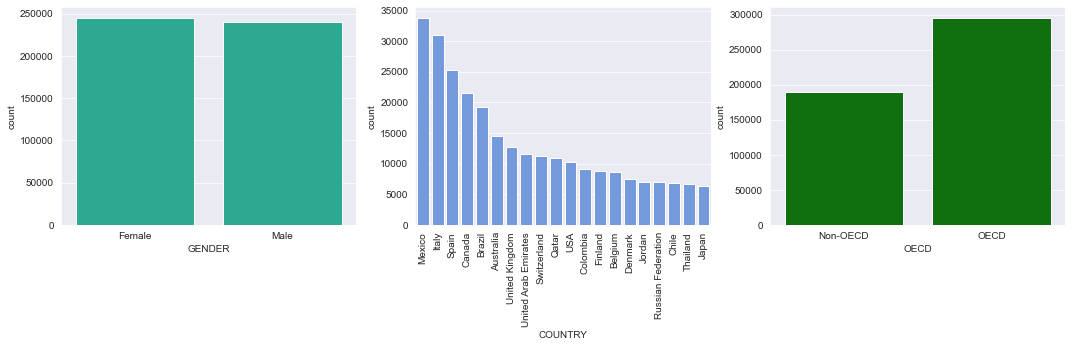

In [69]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sb.countplot(data = df_clean, x = 'GENDER', color = '#1abc9c'
plt.subplot(132)
sb.countplot(data = df_clean, x = 'COUNTRY', order=df_clean.COUNTRY.value_counts().iloc[:20].index, color = 'cornflowerblue'
plt.xticks(rotation = 90)
plt.subplot(133)
sb.countplot(data = df_clean, x = 'OECD', color = 'green'

#### Answer:
Data is evenly split between genders. We can group the population of students in almost half-gender and half-male.

The chart for the countries contributed in this project is skwed towards North America and Europe. More countries from these regions have been contributed in this project. This sounds reasonable since  number of OECD countries in this projcet is clearly more than Non-OECD countries and OECD countries are mostly europian and north American.



## Math, Science and reading Scores
Examine the distributions of the math, reading, and science evaluations of student performance.

####  Questions to be answered here:
What are the trends? Are there any noticeable differences in the distributions?

#### Questions to be answered in bivariable analysis:
What cause the peak and what causes the lowest scores?


In [70]:
df_clean.columns

Index(['COUNTRY', 'OECD', 'SCHOOL_ID', 'STUDENT_ID', 'GENDER', 'PRESCHOOL',
       'EDUCATION_START_AGE', 'DESKTOP_COMPUTER_AT_HOME',
       'PORTABLE_LAPTOP_AT_HOME', 'TABLET_COMPUTER_AT_HOME',
       'INTERNET_CONNECTION_AT_HOME', 'VIDEO_GAMES_CONSOLE_AT_HOME',
       'CELL_PHONE_W/O_INTERNET_AT_HOME', 'CELL_PHONE_WITH_INTERNET_AT_HOME',
       'LANGUAGE_START_AGE', 'FATHER_SQ_ISEI', 'MOTHER_SQ_ISEI',
       'CULTURAL_DISTANCE', 'INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS',
       'FAMILY_STRUCTURE', 'EDUCATIONAL_LEVEL_OF_FATHER',
       'HOME_EDUCATIONAL_RESOURCES', 'HIGHEST_EDUCATIONAL_LEVEL_OF_PARENTS',
       'HIGHEST_PARENTAL_OCCUPATIONAL_STATUS', 'IMMIGRATION_STATUS',
       'LANGUAGE_LEARNING_TIME_PER_WEEK', 'EDUCATIONAL_LEVEL_OF_MOTHER',
       'MATHS_LEARNING_TIME_PER_WEEK', 'MOTHER_OCCUPATION_CODE',
       'FATHER_OCCUPATION_CODE', 'SCIENCE_LEARNING_TIME_PER_WEEK',
       'PLAUSIBLE_VALUE_1_IN_MATHEMATICS', 'PLAUSIBLE_VALUE_2_IN_MATHEMATICS',
       'PLAUSIBLE_VALUE_3_IN_

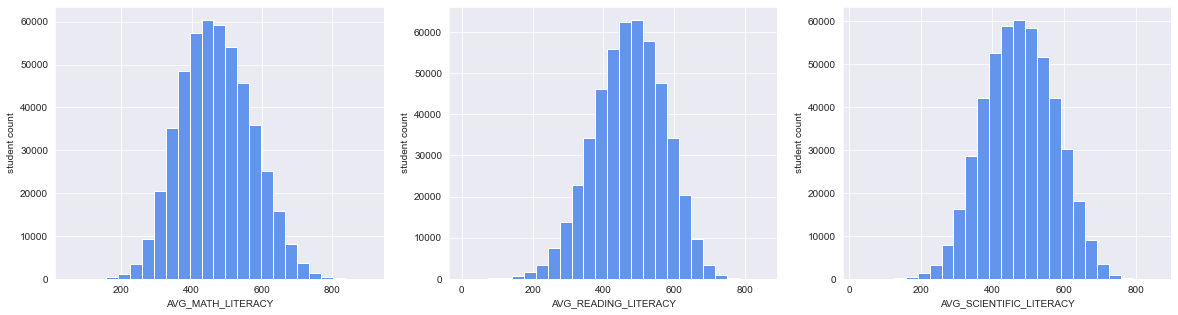

In [71]:
# Create histograms of all students' test scores
fig, ax = plt.subplots(1,3, figsize = [20,5])
variables = ["AVG_MATH_LITERACY", "AVG_READING_LITERACY", "AVG_SCIENTIFIC_LITERACY"]
for i in range(len(variables)):
    var = variables[i]
    ax[i].hist(data = df_clean, x = var, bins = 25, color = 'cornflowerblue')
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('student count')
plt.show()

#### Answer:
All three evaluations are Normally distributed with centers around 500.

### The time devoted to instructing students
Examine the distribution of instructional minutes of math, language, and science.


#### Questions to be answered here:
What subjects receive the most minutes?
Any wierd trends?

#### Questions to be answered in bivariable analysis:
How do these times influence the student's performance? More minutes , better performance?



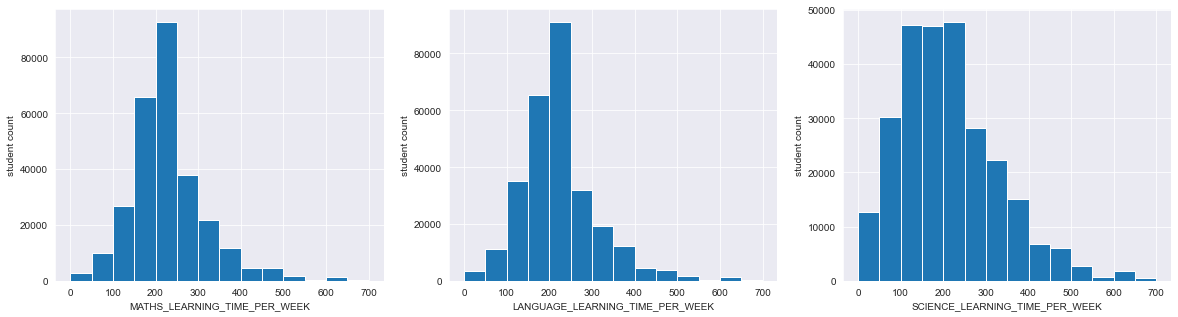

In [72]:
# Create histograms of all students' test scores
fig, ax = plt.subplots(1,3, figsize = [20,5])
variables = [columns['MMINS'], columns['LMINS'], columns['SMINS']]
for i in range(len(variables)):
    bins = np.arange(0,710,50)
    var = variables[i]
    ax[i].hist(data = df_clean, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('student count')
plt.show()

#### Answer
Instructional time seems to be normally spread in math and language, 150-250 minutes per week. However,instructional time for science varies more from student to student.

# Immigration
Examine the distribution of the immigration background.

#### Questions to be answered here:
Are most of the students native to the country they reside in?

In case of having an immigration background, to which group do they belong? seconf or fisrt generation?


#### Questions to be answered in bivariable analysis:
How does having an immigration background affect the performance?

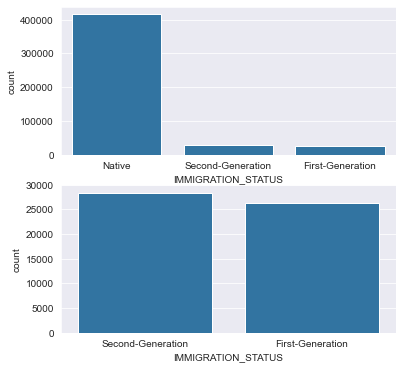

In [73]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(6,6))
plt.subplot(211)
sb.countplot(data = df_clean, x = columns['IMMIG'], color = base_color)
plt.subplot(212)
sb.countplot(data = df_clean[df_clean.IMMIGRATION_STATUS.isin(['Second-Generation','First-Generation'])], x = columns['IMMIG'], color = base_color)
plt.ylim(0,30000

#### Answer
Most of the students in the data set are native to their country.

# Parental Education and Employment
Investigate the levels of education and employment of parents.

#### Questions to be answered here:
What are the most common levels of educational achievement and occupation?



#### Questions to be answered in bivariable analysis:
Is there any relationship between parents income or level of education and the student's performance?

In [74]:
# organize the levels of parent education in ordered data
levels = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
df_clean['PARENT_EDUCATION'] = df_clean[columns['HISCED']].astype(edu_levels)

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

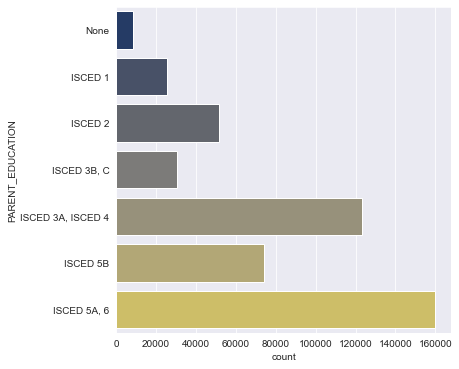

In [75]:
plt.figure(figsize=(6,6))
xticks = np.arange(0,170000,20000)
xlabels = ['0k','20k','40k','60k','80k','100k','120k','140k','160k']
sb.countplot(data = df_clean, y = 'PARENT_EDUCATION', palette = 'cividis')
plt.xticks

In [76]:
df_clean[['PARENT_EDUCATION']].describe()

,PARENT_EDUCATION
count,473091
unique,7
top,"ISCED 5A, 6"
freq,159942


#### Answer
Spikes occur at lower secondary (ISCED 2), upper secondary (ISCED 3A or 4), and university or graduate studies (ISCED 5A or 6) with most parents having a degree.

Text(0.5, 0, 'Highest Parental Occupation')

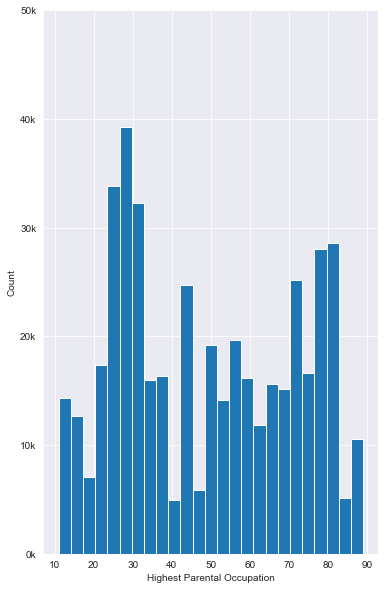

In [77]:
yticks = np.arange(0,51000,10000)
ylabels = ['0k','10k','20k','30k','40k','50k']
plt.figure(figsize=(6,10))

plt.hist(df_clean[columns['HISEI']], bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Highest Parental Occupation')

#### Answer
Distribution of occupational level for parents has a multimodal shape with a mean of approximately 49 and a standard deviation of 22 (with a minumum of 11 and maximum of 89).

In [78]:
df_clean[columns['HISEI']].describe()

count    450621.000000
mean         48.923298
std          22.120953
min          11.010000
25%          28.520000
50%          48.820000
75%          70.340000
max          88.960000
Name: HIGHEST_PARENTAL_OCCUPATIONAL_STATUS, dtype: float64

### Educational Beginnings
Investigate when the students' education began.

#### Questions to be answered here:
What percentage of the children attend preschool before going to school?

#### At which age do children start formal education?

#### Questions to be answered in bivariable analysis:
Is there any relationship between preschooling and the student's performance?

Does beginning formal education improve the performance?

In [79]:
df_clean['PRESCHOOL'].unique()

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

In [81]:
levels = ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year']
preschool_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
df_clean['PRESCHOOL'] = df_clean['PRESCHOOL'].astype(preschool_levels)

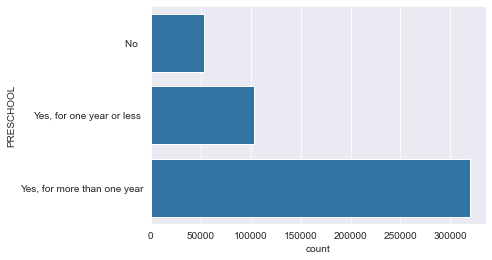

In [82]:
sb.countplot(data = df_clean, y = 'preschool'.upper(), color = base_color

#### Answer
Most of the students had attended preschool. A majority of the students participated in a preschool for more than one year.


In [83]:
df_clean.EDUCATION_START_AGE.isnull().shape
df_clean.PRESCHOOL.isnull().shape

(485490,)

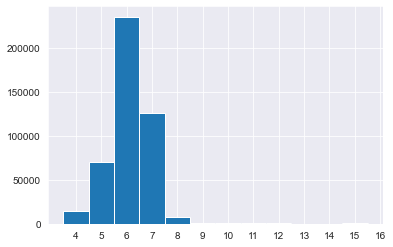

In [85]:
bins = np.arange(4, 17, 1)
plt.hist(df_clean['EDUCATION_START_AGE'], bins = bins)
plt.xticks(bins+0.5, bins

#### Answer
Data does not exist for most of the students in the study, but for those with data,Most children began their formal education around 6.



### Family Structure
Distribution of family structure and social status.

#### Questions to be answered here:
Do children mostly live with two parents or not?

How is social status distributed across families of these students?

#### Questions to be answered in bivariable analysis:
Is there any relationship between the number of parents and the student's performance?

Is there any relationship between the socio-economic status of the family and the student's performance?



In [86]:
df_clean.FAMILY_STRUCTURE.value_counts()

2.0    360003
1.0     58264
3.0     10791
Name: FAMILY_STRUCTURE, dtype: int64

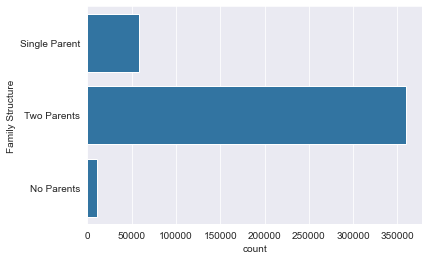

In [87]:
g = sb.countplot(data = df_clean, y = 'FAMILY_STRUCTURE', color = base_color)
g.set_yticklabels(['Single Parent','Two Parents','No Parents'])
plt.ylabel('Family Structure'

#### Answer
A great majority of the students have a two-parent household, but there are still considerable amounts of students in single-parent household and other family arrangements.



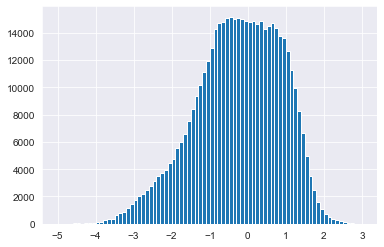

In [89]:
plt.hist(df_clean.INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS, bins = np.arange(-5,3.1,0.1)

#### Answer
The index of social, economic, and cultural status above has a left-skew diagram, resulting in being more likely to have a score between -4 and -2 than a score between 2 and 4.



In [90]:
df_clean.INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS.describe()

count    473648.000000
mean         -0.265546
std           1.131791
min          -5.950000
25%          -1.000000
50%          -0.190000
75%           0.610000
max           3.690000
Name: INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS, dtype: float64

### Media
Investigate the access of the students to tablet, cellphone and internet.

#### Questions to be answered here:
How much do the students have access to tablet, desktop, cellphone and internet?

#### Questions to be answered in bivariable analysis:
IS this access to internet and cellphone harmful to their academic performance?

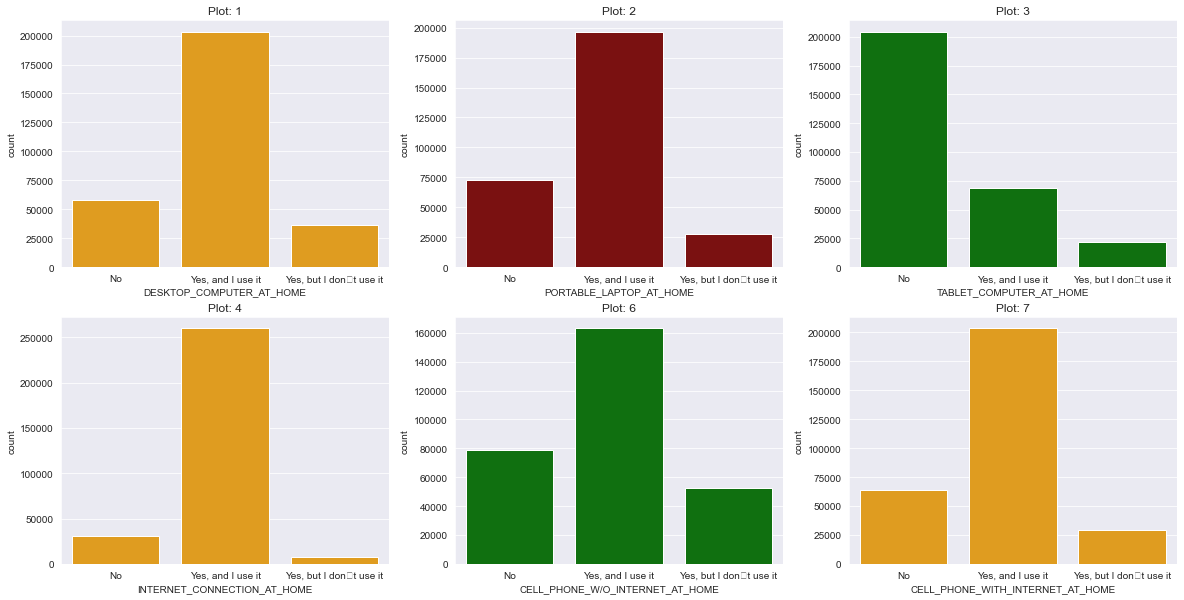

In [91]:
fig, ax = plt.subplots(2,3, figsize=(20, 10))

sb.countplot(data=df_clean, x= columns['IC01Q01'], color='orange', ax=ax[0][0]
ax[0][0].title.set_text('Plot: 1')

sb.countplot(data=df_clean, x= columns['IC01Q02'], color='darkred', ax=ax[0][1]
ax[0][1].title.set_text('Plot: 2')

sb.countplot(data=df_clean, x= columns['IC01Q03'], color='green', ax=ax[0][2]
ax[0][2].title.set_text('Plot: 3')

sb.countplot(data=df_clean, x= columns['IC01Q04'], color='orange', ax=ax[1][0]
ax[1][0].title.set_text('Plot: 4')


sb.countplot(data=df_clean, x= columns['IC01Q06'], color='green', ax=ax[1][1]
ax[1][1].title.set_text('Plot: 6')

sb.countplot(data=df_clean, x= columns['IC01Q07'], color='orange', ax=ax[1][2]
ax[1][2].title.set_text('Plot: 7')

#### Answer
Most students have access to internet, laptop and cellphone and they use it.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
No transformations were necessary so far since almost all datasets were normally distributed with no outliers thus no transformations was needed.



## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


Parental occupation has an unusual distribution.

Many variables were converted from strings to ordinal categorical variables to further aid additional analysis. This allows the categories to show up in their logical order, which improves the readability of the graphs and subsequent analysis.



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Gender Effect
#### Questions to be answered here:
Are there any noticeable differences in academic performance regarding the genders?

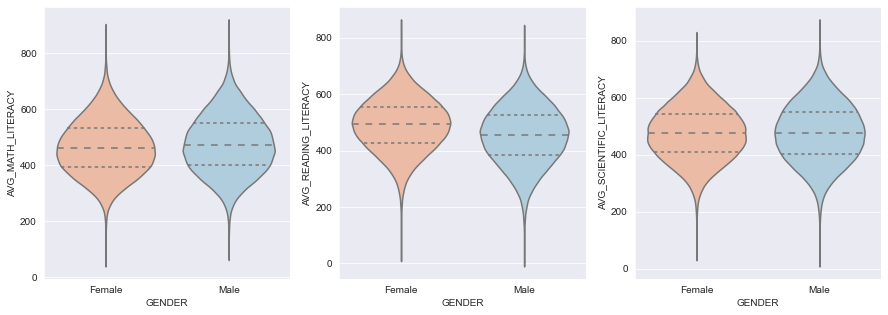

In [94]:
plt.figure(figsize = (15,5))
plt.subplot(131)
# graph the distribution of math performance according to gender
sb.violinplot(data = df_clean, x = 'GENDER', y = 'AVG_MATH_LITERACY', palette = 'RdBu', inner = 'quartile'
plt.subplot(132)
# graph the distribution of reading performance according to gender
sb.violinplot(data = df_clean, x = 'GENDER', y = 'AVG_READING_LITERACY', palette = 'RdBu', inner = 'quartile'
plt.subplot(133)
# graph the distribution of science performance according to gender
sb.violinplot(data = df_clean, x = 'GENDER', y = 'AVG_SCIENTIFIC_LITERACY', palette = 'RdBu', inner = 'quartile'

## Country Performance and Status
In this part we will look at the performance of the countries. We will group the students by their country to get an overall view of each country's performance in each different academic subject. Simeltanousely, we will investigate if the performance of each country is accordant with its socio-economc status. I expect to see that wealthier countries perform better because of accessing to better resources.

Questions to be answered here:
Are the connections between social status and academic performance across all countries?

In [95]:
# gather the names of the 30 most represented countries in this study
top_countries = df_clean.COUNTRY.value_counts().iloc[:30].index
# gather the mean data for each of those 25 most represented countries to use in this subset of analysis
df_clean_countries = df_clean.groupby('COUNTRY').mean()[df_clean.groupby('COUNTRY').mean().index.isin(top_countries)]
df_clean_countries.head(3)

,SCHOOL_ID,STUDENT_ID,EDUCATION_START_AGE,FATHER_SQ_ISEI,MOTHER_SQ_ISEI,CULTURAL_DISTANCE,INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS,FAMILY_STRUCTURE,HOME_EDUCATIONAL_RESOURCES,HIGHEST_PARENTAL_OCCUPATIONAL_STATUS,...,PLAUSIBLE_VALUE_1_IN_SCIENCE,PLAUSIBLE_VALUE_2_IN_SCIENCE,PLAUSIBLE_VALUE_3_IN_SCIENCE,PLAUSIBLE_VALUE_4_IN_SCIENCE,PLAUSIBLE_VALUE_5_IN_SCIENCE,AVG_MATH_LITERACY,AVG_SCIENTIFIC_LITERACY,AVG_READING_LITERACY,AVG_ACADEMIA,AVG_EDU_MINS_PER_WEEK
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Argentina,111.777759,2954.5,5.905549,39.388021,44.520362,NaN,-0.626649,1.823185,-0.437513,45.448089,...,410.369278,409.927403,410.600994,410.651660,410.842687,395.635711,410.478404,403.596060,403.236725,264.422805
Australia,388.862233,7241.0,5.205203,45.887178,51.102848,NaN,0.189072,1.870798,-0.004287,56.649833,...,511.250599,511.427811,512.042515,511.775281,511.694853,493.268939,511.638212,501.056931,501.988027,233.401965
Belgium,145.623124,4299.0,5.892964,45.948248,46.044963,-0.143072,0.175149,1.878058,0.114331,52.165685,...,510.475079,510.124080,510.177555,510.588426,510.147835,519.668410,510.302595,512.281728,514.084244,208.447282


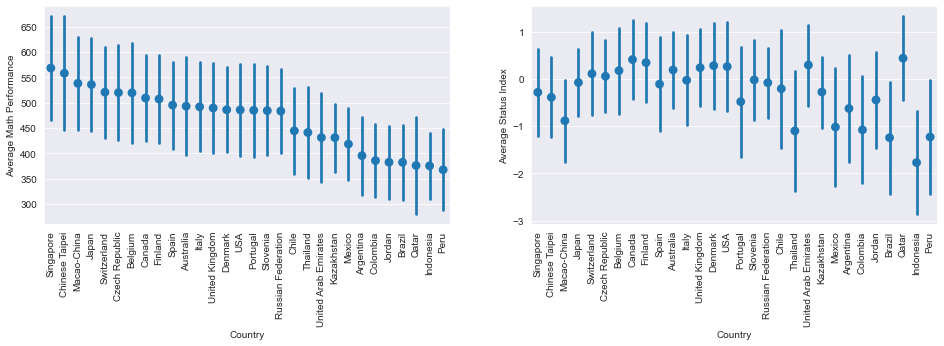

In [96]:
# order top 25 countries by their average student math score
math_order = df_clean_countries.AVG_MATH_LITERACY.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of math score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = df_clean, x = 'COUNTRY', y = 'AVG_MATH_LITERACY', order = math_order, ci = 'sd', color = base_color, linestyles = ""
plt.xlabel('Country')
plt.ylabel('Average Math Performance')
plt.xticks(rotation = 90
# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = df_clean, x = 'COUNTRY', y = columns['ESCS'], order = math_order, ci = 'sd', color = base_color, linestyles = "")
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90

#### Answer
Overally, countries with higher avg_status_index perform good (above 500) and countries with lower avg_status_index do not have a very good performance(below 450). However, some countries like Qatar,UAE and China go against this trend.

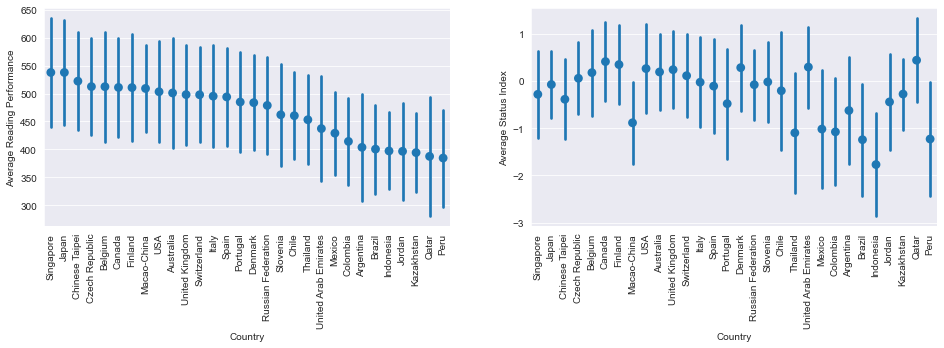

In [99]:
# order top 30 countries by their average student reading score
math_order = df_clean_countries.AVG_READING_LITERACY.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of math score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = df_clean, x = 'COUNTRY', y = 'AVG_READING_LITERACY', order = math_order, ci = 'sd', color = base_color, linestyles = ""
plt.xlabel('Country')
plt.ylabel('Average Reading Performance')
plt.xticks(rotation = 90)
# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = df_clean, x = 'COUNTRY', y = columns['ESCS'], order = math_order, ci = 'sd', color = base_color, linestyles = "")
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90

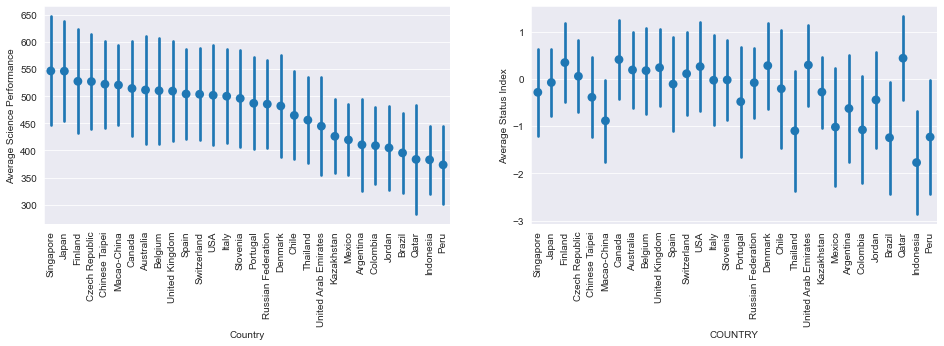

In [102]:
# order top 30 countries by their average student science score
math_order = df_clean_countries.AVG_SCIENTIFIC_LITERACY.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of math score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = df_clean, x = 'COUNTRY', y = 'AVG_SCIENTIFIC_LITERACY', order = math_order, ci = 'sd', color = base_color, linestyles = "")
plt.xlabel('Country')
plt.ylabel('Average Science Performance')
plt.xticks(rotation = 90
# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = df_clean, x = 'COUNTRY', y = columns['ESCS'], order = math_order, ci = 'sd', color = base_color, linestyles = "")
plt.xlabel('COUNTRY')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90

#### Answer:
Overally, countries with higher avg_status_index perform good (above 500) and countries with lower avg_status_index do not have a very good performance(below 450). However, some countries like Qatar,UAE and China go against this trend. Thus, we can consider status index of the countries as an indicator of their student's performance - although there are exceptions.

## OECD Status and Performance
### Questions to be answered here:
Does a country's partnership with the OECD goals contribute to academic performance?
Do OECD countries neccessarily have better status index?

<AxesSubplot:xlabel='OECD', ylabel='INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS'>

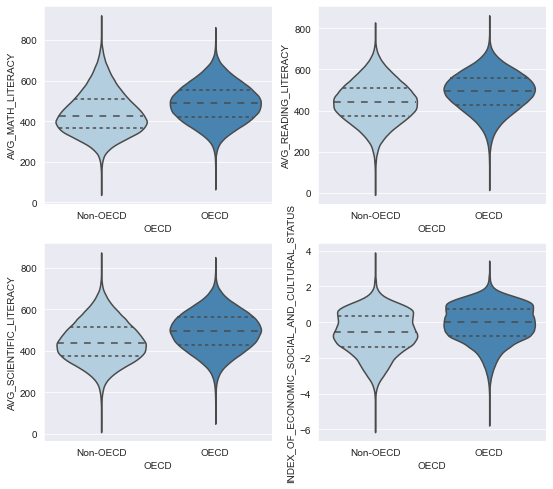

In [104]:
# explore the relationship between country OECD partnership and academic performance as well as family social status
plt.figure(figsize = (9,8))
plt.subplot(221)
sb.violinplot(data = df_clean, x = columns['OECD'], y = 'AVG_MATH_LITERACY', palette = 'Blues', inner = 'quartile')
plt.subplot(222)
sb.violinplot(data = df_clean, x = columns['OECD'], y = 'AVG_READING_LITERACY', palette = 'Blues', inner = 'quartile')
plt.subplot(223)
sb.violinplot(data = df_clean, x = columns['OECD'], y = 'AVG_SCIENTIFIC_LITERACY', palette = 'Blues', inner = 'quartile')
plt.subplot(224)
sb.violinplot(data = df_clean, x = columns['OECD'], y = columns['ESCS'], palette = 'Blues', inner = 'quartile')

### Answer
The average performance and status index of OECD countries is slightly better than non-OECD countries. The difference is almost the same for all three subjects.




## Instructional Time and Academic Performances
### Questions to be answered here:
How efficient is education at schools? Do more 'math_min' (the amount of minutes per week math is taught) result in better math score?

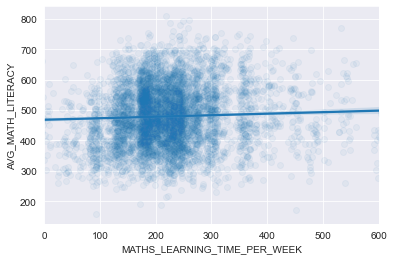

In [122]:
# explore relatonship between math instruction minutes and performance
sb.regplot(data = df_clean.sample(10000), x = columns['MMINS'], y = 'AVG_MATH_LITERACY', x_jitter = 10, scatter_kws = {'alpha': 0.05})
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600)


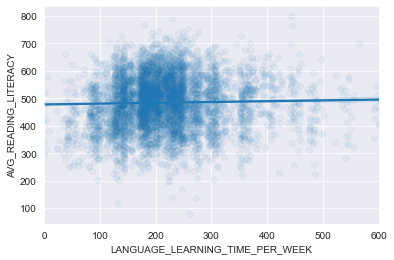

In [124]:
# explore relationship between language instructional minutes and reading performance
sb.regplot(data = df_clean.sample(10000), x = columns['LMINS'], y = 'AVG_READING_LITERACY', x_jitter = 10, scatter_kws = {'alpha': 0.05})
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600

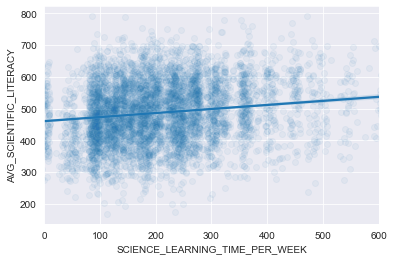

In [125]:
# explore relationship between science instructional minutes and performance
sb.regplot(data = df_clean.sample(10000), x = columns['SMINS'], y = 'AVG_SCIENTIFIC_LITERACY', x_jitter = 10, scatter_kws = {'alpha': 0.05})
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600

### Answer:
We can see how different average scores are spreading across different instructional minutes. Thus, that average scores seems not be strongly related to the instructional minutes. An increase in instructional minutes had resulted in:

> A marginal increase in average science scores,

> insignificant increase in average math scores,

> no change in average reading scores.

## Country Performance and Status
In this part we will look at the performance of the countries. We will group the students by their country to get an overall view of each country's performance in each different academic subject. Simeltanousely, we will investigate if the performance of each country is accordant with its socio-economc status. I expect to see that wealthier countries perform better because of accessing to better resources.




## Immigration Generation vs. Academic Performance
### Questions to be answered here:
Does the families immigration history influence student acacdemic performance?



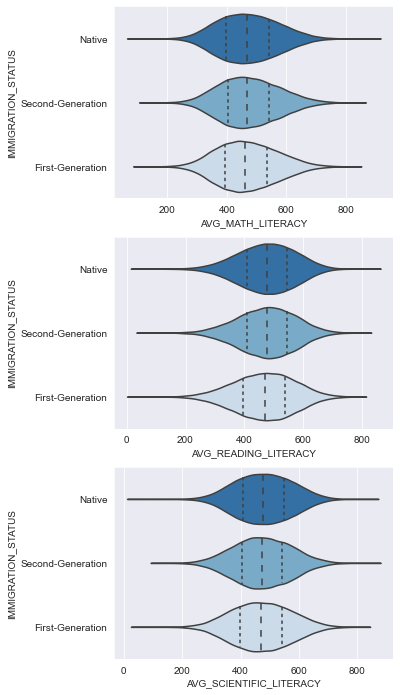

In [126]:
# graph the relationship between immigration generation across all three academic areas of performance
plt.figure(figsize=(5,12))
plt.subplot(311)
sb.violinplot(data = df_clean, y = columns['IMMIG'], x = 'AVG_MATH_LITERACY', inner = 'quartile', palette = 'Blues_r'
plt.subplot(312)
sb.violinplot(data = df_clean, y = columns['IMMIG'], x = 'AVG_READING_LITERACY', inner = 'quartile', palette = 'Blues_r'
plt.subplot(313)
sb.violinplot(data = df_clean, y = columns['IMMIG'], x = 'AVG_SCIENTIFIC_LITERACY', inner = 'quartile', palette = 'Blues_r'

### Answer:
It seems that immigration has almost no influence in academic performance of the students: The median of average score for all three groups in each subject is the same and the distribution is pretty normal.

## Parental Education vs. Student Academics
Questions to be answered here:
1. How does the academic achievement of parents relate to the academic achievement of their children?

2. Why this happens?

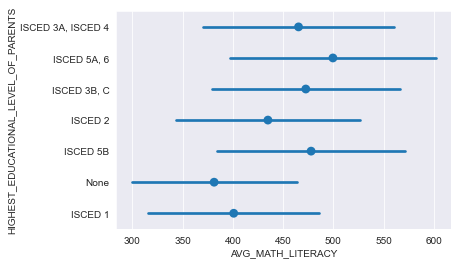

In [129]:
# graph the relationship between highest parental education and student math score
sb.pointplot(data = df_clean, y = columns['HISCED'], x = 'AVG_MATH_LITERACY', ci = 'sd', linestyles = ""

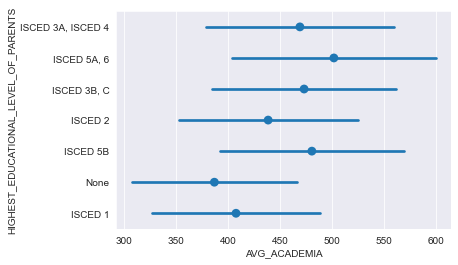

In [136]:
# graph the relationship between highest parental education and student math score
sb.pointplot(data = df_clean, y = columns['HISCED'], x = 'AVG_ACADEMIA', ci = 'sd', linestyles = ""

### Answer 1:
From the chart above, it can clearly be seen that as the deucation level of parents increases there would also be an increase in academic performance. The level of parental education is strongly correlated to the level of student achievement.


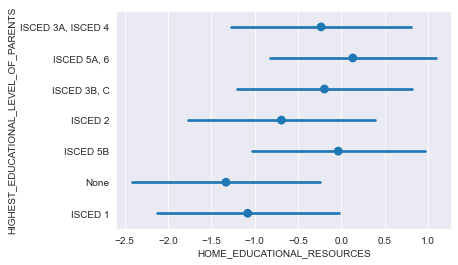

In [137]:
# graph the relationship between highest parental education and access to home educational resources
sb.pointplot(data = df_clean, y = columns['HISCED'], x = columns['HEDRES'], ci = 'sd', linestyles = ""

### Answer 2:
According to this chart, more educated parents provide their children with more educational resources. This might be one reason why the children of more educated parents have better academic performances.

## Parental Occupation Status vs. Academic Performance
### Questions to be answered here:
Does parental occupation influence the student's performance?

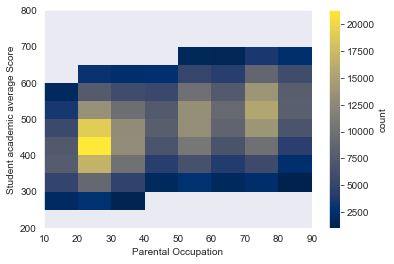

In [138]:
# establish bin boundaries for parent occupation scores
occ_bins = np.arange(10,95,10)
# establish bin boundaries for student academic scores
score_bins = np.arange(200,850,50)

# graph the density of points relating parental occupation to student academic performance
plt.hist2d(data = df_clean, x = columns['HISEI'], y = 'AVG_ACADEMIA', bins = [occ_bins, score_bins], cmin = 1000, cmap = 'cividis')
plt.colorbar(label = 'count')
plt.xlabel('Parental Occupation')
plt.ylabel('Student academic average Score'

### Answer:
The yellow boxes(more populated areas) shift upward right in the chart which means there is a strong correlation between parental occupation and academic achievement of the student. However, each occupational level consists of almost all kind of scores.

## Preschool Effect on Academic Performance
### Questions to be answered here:
What is the effect of early childhood education (preschool) on student academic performance?

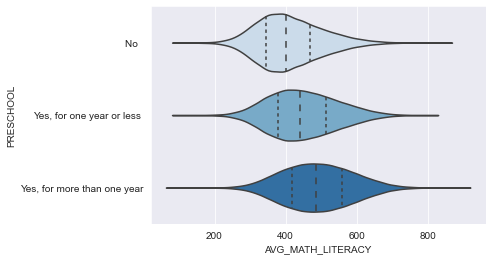

In [139]:
# graph the distribution of math performance according to preschool experience
sb.violinplot(data = df_clean, y = 'PRESCHOOL', x = 'AVG_MATH_LITERACY', inner='quartile', palette = 'Blues'

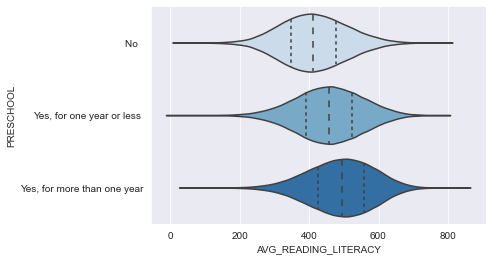

In [140]:
# graph the distribution of Reading performance according to preschool experience
sb.violinplot(data = df_clean, y = 'PRESCHOOL', x = 'AVG_READING_LITERACY', inner='quartile', palette = 'Blues'

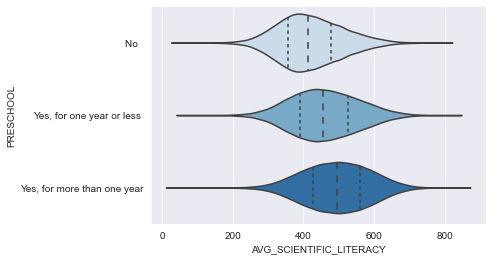

In [141]:
# graph the distribution of science performance according to preschool experience
sb.violinplot(data = df_clean, y = 'PRESCHOOL', x = 'AVG_SCIENTIFIC_LITERACY', inner='quartile', palette = 'Blues'

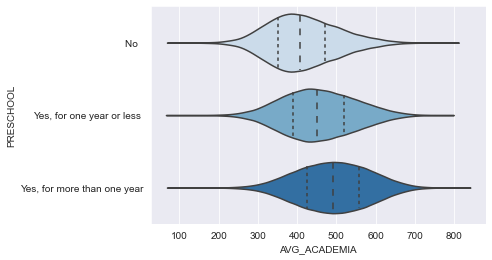

In [142]:
# graph the distribution of average academia  according to preschool experience
sb.violinplot(data = df_clean, y = 'PRESCHOOL', x = 'AVG_ACADEMIA', inner='quartile', palette = 'Blues'


### Answer:
It seems that children who had attended the preschool are capabale of achieving better scores with around 30 to 50 scores more than the students who did not go to preschool.

## Family Structure and Status and Student Performance
### Questions to be answered here:
1. Is social status index a good measure for performance?
2. Does the number of parents affect the performance?
3. what is the relationship between status index and number of parents? (investigating the correlation between social index and each variable is being carried out since we want to see what soical index exactly tell us. Finding more linear relationships helps us use soical index as a measure (using interchangeably) of too many variables like resources, good or bad occupation status and etc.)

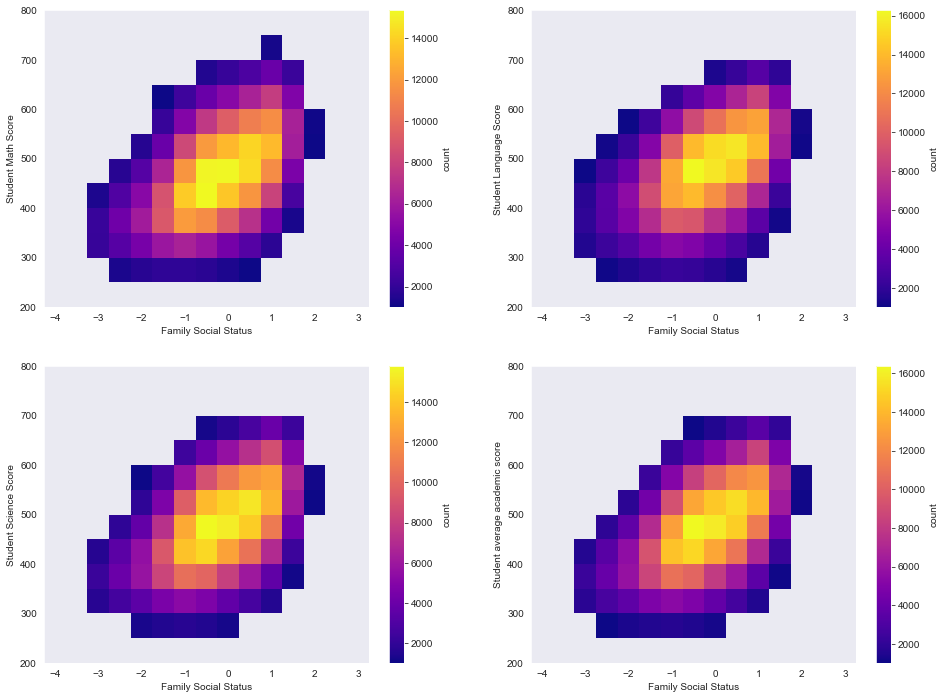

In [146]:
# establish bin structure for standardized score of social status and student confidence
std_bins = np.arange(-4.25,3.5,0.5)
# establish bin structure for academic scores
score_bins = np.arange(200,850,50)

plt.figure(figsize = (16, 12))
plt.subplot(221)
# plot density of family social status and math score
plt.hist2d(data = df_clean, x = columns['ESCS'], y = 'avg_math_literacy'.upper(), bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Math Score'
plt.subplot(222)
# plot density of family social status and reading score
plt.hist2d(data = df_clean, x = columns['ESCS'], y = 'avg_reading_literacy'.upper(), bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Language Score'
plt.subplot(223)
# plot density of family social status and science score
plt.hist2d(data = df_clean, x = columns['ESCS'], y = 'avg_scientific_literacy'.upper(), bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Science Score'
plt.subplot(224)
# plot density of family social status and average academic score
plt.hist2d(data = df_clean, x = columns['ESCS'], y = 'avg_academia'.upper(), bins = [std_bins, score_bins], cmin = 1000, cmap = 'plasma')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student average academic score'

### Answer 1:
Higher family social status is related to stronger academic performance.

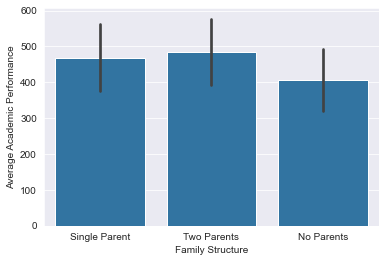

In [147]:
# plot the distribution of math scores according to family parental structure
ax = sb.barplot(data = df_clean, x = 'FAMILY_STRUCTURE', y = 'AVG_ACADEMIA', ci = 'sd', color = base_color
ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
plt.xlabel('Family Structure')
plt.ylabel('Average Academic Performance'

### Answer 2:
The performance of students with at least one parent is obviously better than children with none.

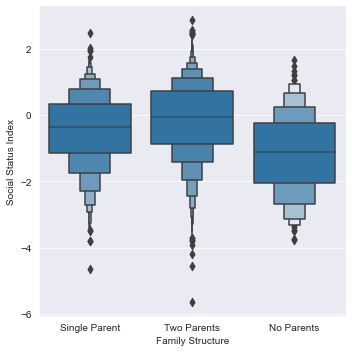

In [148]:
# plot the distribution of social status according to family parental structure
ax = sb.catplot(data = df_clean.sample(10000), x = 'FAMILY_STRUCTURE', y = columns['ESCS'], kind = 'boxen', color = base_color
ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
plt.xlabel('Family Structure')
plt.ylabel('Social Status Index'

### Answer 3:
Social status index of families with two parents is better than that of single parent and the social index of the single parent family is obviously better than index of the families with none.

## Internet, cellphone, video games
## Questions to be answered here:
1. Does accessing to internet negatively affect the student's performance?
2. Does playing video games decrease the student's score?
3. Is having a cell phone bad regarding students performance?


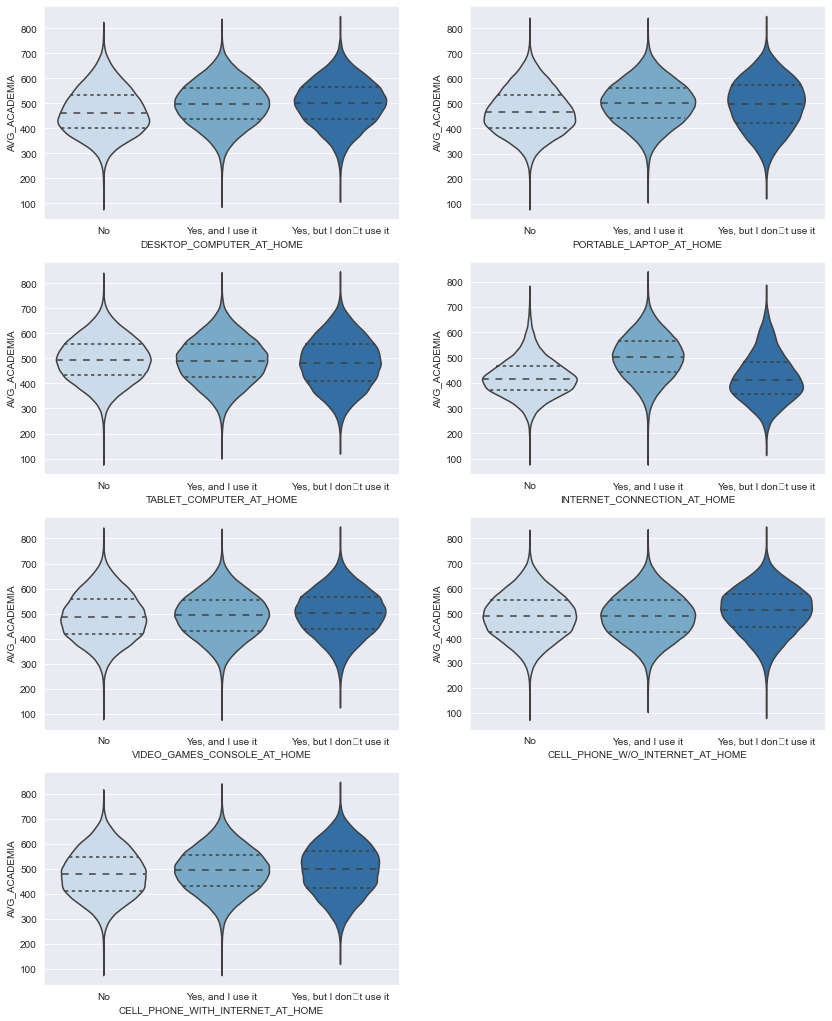

In [149]:
plt.figure(figsize = (14,18))
plt.subplot(421)
sb.violinplot(data = df_clean, x = columns['IC01Q01'], y = 'AVG_ACADEMIA', inner='quartile', palette = 'Blues'
plt.subplot(422)
sb.violinplot(data = df_clean, x = columns['IC01Q02'], y = 'AVG_ACADEMIA', inner='quartile', palette = 'Blues'
plt.subplot(423)
sb.violinplot(data = df_clean, x = columns['IC01Q03'], y = 'AVG_ACADEMIA', inner='quartile', palette = 'Blues'
plt.subplot(424)
sb.violinplot(data = df_clean, x = columns['IC01Q04'], y = 'AVG_ACADEMIA', inner='quartile', palette = 'Blues'
plt.subplot(425)
sb.violinplot(data = df_clean, x = columns['IC01Q05'], y = 'AVG_ACADEMIA', inner='quartile', palette = 'Blues'
plt.subplot(426)
sb.violinplot(data = df_clean, x = columns['IC01Q06'], y = 'AVG_ACADEMIA', inner='quartile', palette = 'Blues'
plt.subplot(427)
sb.violinplot(data = df_clean, x = columns['IC01Q07'], y = 'AVG_ACADEMIA', inner='quartile', palette = 'Blues'

### Answers:
First noticeable information is that having an internet connection has positively contributed to performance. Having or not having and playing or not playing video games seems to have nothing to do with scores. Having or not having and using or not using cell phones seems to have nothing to do with scores

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Preschool experience seems to be leading to higher academic performance.

Parental occupation status and student academic performance are correlated.

Family parental structure affects the status index and academic performance. It seems that having a normal two-parents family is an advantage.

There is a positive relationship between social index and performance.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Gender is related to language score (but not math or science). Student performance by country and average status index by country has a few exceptions that may be worth investigating.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Early Education and Reading
Does the preschool advantage still hold even for adolescent?


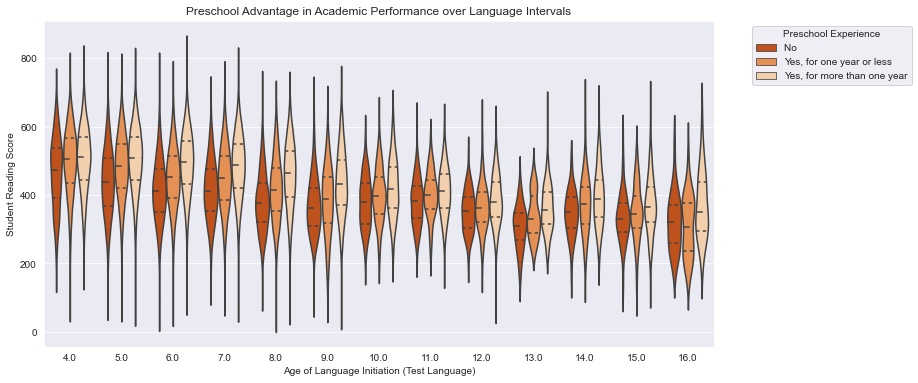

In [150]:
plt.figure(figsize=(12,6))

# analyze preschool experience, age of language initiation, and reading performance
plt.grid(True)
sb.violinplot(data = df_clean, y = 'AVG_READING_LITERACY', x = columns['ST06Q01'], hue = 'PRESCHOOL', scale = 'area', inner = 'quartile', palette = 'Oranges_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title= "Preschool Experience")
plt.ylabel('Student Reading Score')
plt.xlabel('Age of Language Initiation (Test Language)')
plt.title('Preschool Advantage in Academic Performance over Language Intervals')

## Answer:
Taking a preschool course seems to be beneficial for reading skills even for people who want to start learning the language in older ages. The chart also indicates that, the more the years of preschool experience, better the performance would be.

## Parent Occupation, and Social Status
I want to make sure that there is a relationship between occupation and social status independant of education level.\\
## Questions to be answered here:
Do parental occupation level contribute significantly to social status?


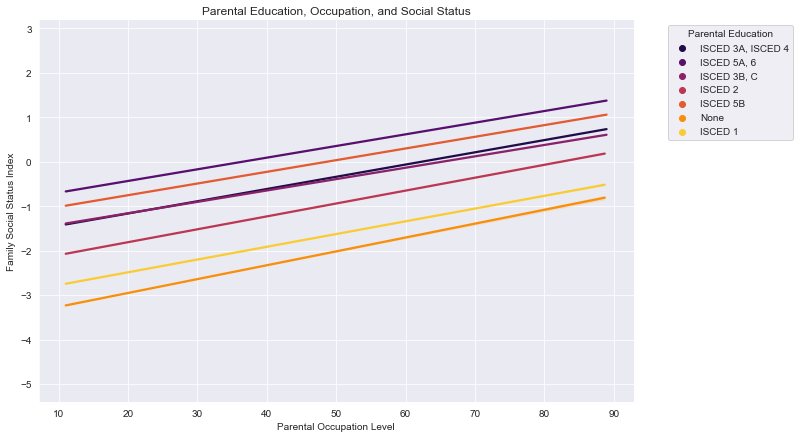

In [151]:
# plot the relationship for parental occupation and family social status across all levels of parental education
g = sb.FacetGrid(data = df_clean, hue = columns['HISCED'], palette = 'inferno', height = 6, aspect = 1.5)

# individual points will not be plotted to keep the graph simple and easy to read
g.map(sb.regplot, columns['HISEI'], columns['ESCS'], scatter_kws = {'alpha': 0})

# make the colors visible in the key so that the levels of parental education are clear
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title = "Parental Education")
for lh in leg.legendHandles:
    lh.set_alpha(1)

plt.ylabel('Family Social Status Index')
plt.xlabel('Parental Occupation Level')
plt.title('Parental Education, Occupation, and Social Status')

This plot shows that higher occupational level guarantees higher status index. in occupational level one can probably elevate her or his status index by achieving higher educational degrees.



## Parental Education, Family Social Status, and Performance
Does family social status still have a relationship with student academic performance if we separate each level of parental education?

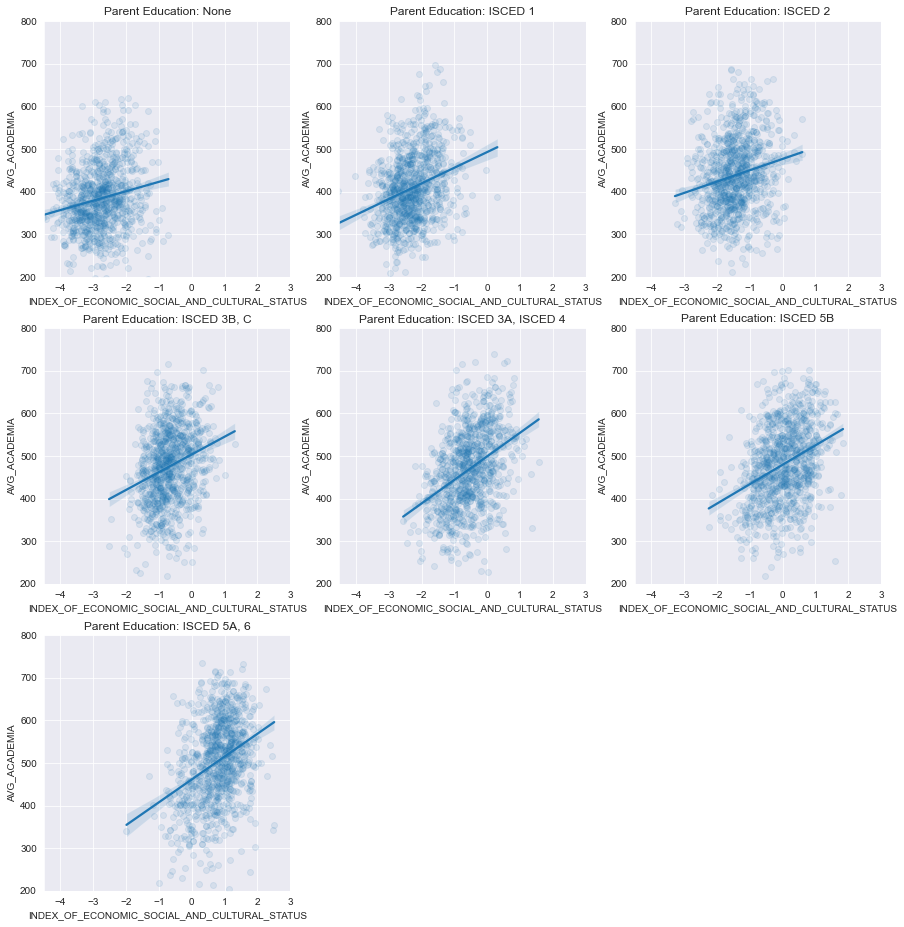

In [157]:
plt.figure(figsize = (15, 16)

# counter variable for proper subplot placement
i =

# loop through each level of parental education from least to most
for _ in df_clean.PARENT_EDUCATION.unique().sort_values():
    # if the level of parental education is given, then plot the graph
    if _ == _:
        plt.subplot(3,3,i+1)
        # label the graph with the appropriate level of education
        plt.title('Parent Education: {}'.format(_))
        # for consistent comparison, take a sample of 1000 from that level of parental education
        sub_data = df_clean[df_clean['PARENT_EDUCATION'] == _].sample(1000)
        sb.regplot(data = sub_data, x = columns['ESCS'], y = 'AVG_ACADEMIA', scatter_kws = {'alpha':0.1})
        plt.xlim(-4.5,3)
        plt.ylim(200,800)
        i += 1

The Family status is a positive predictor of student academic performance. This trend exists in every educational level.

Limitation: there is still a broad spread of academic scores at similar educational levels.

## Family Parental Structure, Status Index, and Academic Performance
How does the family parental structure effect the relationship between family social status and student academic performance?



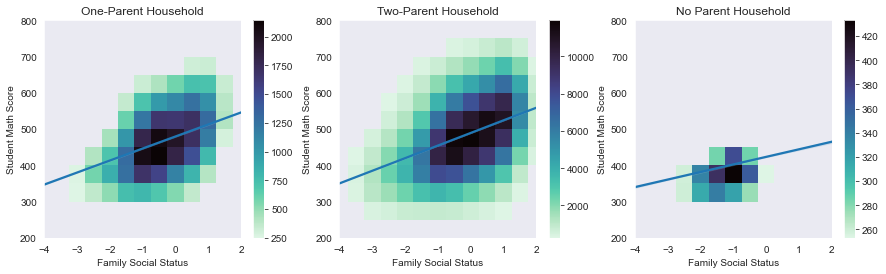

In [159]:
# descriptive titles for the different family structures in the survey
households = ['One-Parent', 'Two-Parent', 'No Parent']
plt.figure(figsize = (15, 4))

# counter variable for proper subplot placement
i = 0

# loop through the three different family structures
for _ in df_clean.FAMILY_STRUCTURE.value_counts().index.sort_values():
    plt.subplot(1,3,i+1)
    plt.grid(True)
    # title each graph appropriately
    plt.title('{} Household'.format(households[int(_)-1]));
    # collect the appropriate data for the current family structure
    sub_data = df_clean[df_clean['FAMILY_STRUCTURE'] == _]
    # plot a 2-dimension histogram (heatmap) of family social status and math score
    plt.hist2d(data = sub_data, x = columns['ESCS'], y = 'AVG_MATH_LITERACY', bins = [std_bins, score_bins], cmin = 250, cmap = 'mako_r')
    # plot a least-squares regression line to further illustrate the relationship
    sb.regplot(data = sub_data, x = columns['ESCS'], y = 'AVG_MATH_LITERACY' , scatter_kws = {'alpha':0})
    plt.xlim(-4,2);
    plt.ylim(200,800);
    plt.xlabel('Family Social Status');
    plt.ylabel('Student Math Score');
    plt.colorbar();
    i += 1;

Not only would that be very difficult for families with no parents to improve their family social status but also even with social status improved the performance improvement of the student is less in these families. Hoever, no reverse trend is seen. social status can be a good indicator of academic performance in every family structure.



## Correlation between Quantitative Variables
Have an overview on correlative Quantitative Variables




<AxesSubplot:>

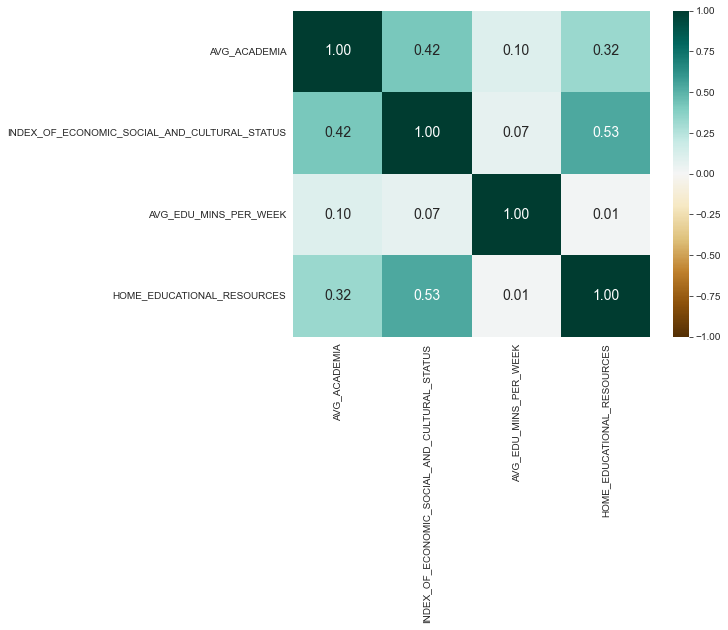

In [160]:
# identify quantitative variables of interest for this correlation map
pisa_stats= ['AVG_ACADEMIA', columns['ESCS'], 'AVG_EDU_MINS_PER_WEEK' ,columns['HISCED'], columns['HEDRES']]
plt.figure(figsize = (8,6))
# graph the correlation map to quantify the strength of relationship between each quantitative variable of interest
sb.heatmap(df_clean[pisa_stats].corr(), cmap='BrBG', annot=True, fmt='.2f', vmin = -1, annot_kws={"fontsize":14})

### Answer:
As analaysed before, the strongest influence on students performance rises from socio-economic status with correlation index of 0.42. since socio economic status has a positivie relationship with parents jobs, education, resources, family structure and the country the student is living in, there's no surprise that correlation index between these variables and status index be high.

## Country Status-Performance Exceptions
Although in previuos explorations (sort of) a linear relationship was found between social status and performance of the coutnries, some countries performed significantly above their average social status, while others performed significantly below their average social status. In this investigation, a data subset is created for the country data. A performance milestone is calculated for comparison purposes: the ranking of the country in averegae academic performance among other countries / the ranking of the country in soical status among other countries For example, from previous observations we know that China's academic performance is high in contrast with its low social index. Thus we expect the china to have a milestone greater than 1 since its academic performance ranking is better than its soical status ranking.



In [164]:
# calculate an academic average for each student
df_clean['AVG_ACADEMIA'] = (df_clean.AVG_MATH_LITERACY + df_clean.AVG_READING_LITERACY + df_clean.AVG_SCIENTIFIC_LITERACY)/3

In [166]:
# produce a subset of the dataframe that organizes the average information by country
df_country_data = df_clean.groupby('COUNTRY').mean()

In [167]:
# investigate which variables are present in the country data (quantitative variables)
df_country_data.columns


Index(['SCHOOL_ID', 'STUDENT_ID', 'EDUCATION_START_AGE', 'FATHER_SQ_ISEI',
       'MOTHER_SQ_ISEI', 'CULTURAL_DISTANCE',
       'INDEX_OF_ECONOMIC_SOCIAL_AND_CULTURAL_STATUS', 'FAMILY_STRUCTURE',
       'HOME_EDUCATIONAL_RESOURCES', 'HIGHEST_PARENTAL_OCCUPATIONAL_STATUS',
       'LANGUAGE_LEARNING_TIME_PER_WEEK', 'MATHS_LEARNING_TIME_PER_WEEK',
       'SCIENCE_LEARNING_TIME_PER_WEEK', 'PLAUSIBLE_VALUE_1_IN_MATHEMATICS',
       'PLAUSIBLE_VALUE_2_IN_MATHEMATICS', 'PLAUSIBLE_VALUE_3_IN_MATHEMATICS',
       'PLAUSIBLE_VALUE_4_IN_MATHEMATICS', 'PLAUSIBLE_VALUE_5_IN_MATHEMATICS',
       'PLAUSIBLE_VALUE_1_IN_READING', 'PLAUSIBLE_VALUE_2_IN_READING',
       'PLAUSIBLE_VALUE_3_IN_READING', 'PLAUSIBLE_VALUE_4_IN_READING',
       'PLAUSIBLE_VALUE_5_IN_READING', 'PLAUSIBLE_VALUE_1_IN_SCIENCE',
       'PLAUSIBLE_VALUE_2_IN_SCIENCE', 'PLAUSIBLE_VALUE_3_IN_SCIENCE',
       'PLAUSIBLE_VALUE_4_IN_SCIENCE', 'PLAUSIBLE_VALUE_5_IN_SCIENCE',
       'AVG_MATH_LITERACY', 'AVG_SCIENTIFIC_LITERACY', 'AVG_REA

In [169]:
df_country_data.AVG_ACADEMIA.value_counts()


396.681895    1
403.236725    1
484.510550    1
490.285328    1
522.702057    1
             ..
477.788793    1
495.826453    1
540.020395    1
394.683219    1
515.730015    1
Name: AVG_ACADEMIA, Length: 64, dtype: int64

In [179]:
# calculate performance milestone.
df_country_data['PERFORMANCE'] = (df_country_data.AVG_ACADEMIA.rank(pct = True)) / (df_country_data[columns['ESCS']].rank(pct = True))
df_country_data.PERFORMANCE.describe()

count    63.000000
mean      2.083763
std       6.521333
min       0.032275
25%       0.727103
50%       0.965074
75%       1.311692
max      52.171875
Name: PERFORMANCE, dtype: float64

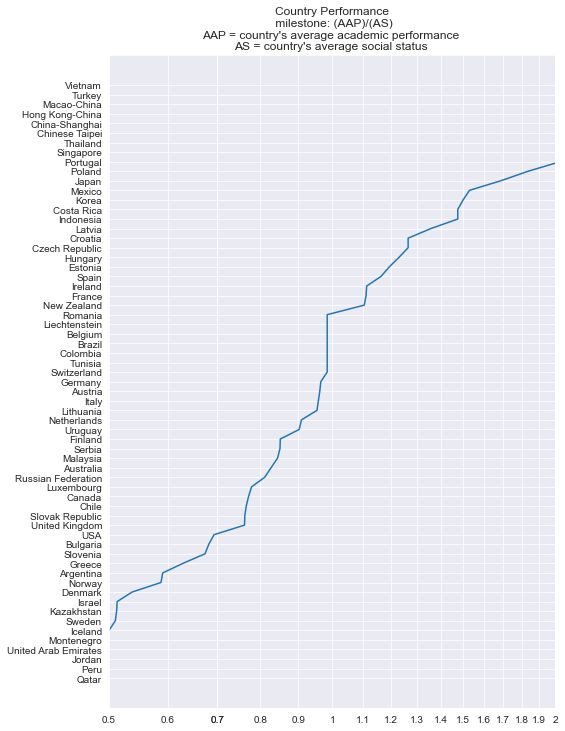

In [180]:
# gather the countries and their respective performance indices
countries = df_country_data.PERFORMANCE.sort_values().dropna().index
perform = df_country_data.PERFORMANCE.sort_values().dropna().values
plt.figure(figsize = (8, 12));
plt.grid(True)

# plot each country and its performance index to show the distribution across all countries
plt.plot(perform, countries);
plt.title('Country Performance\n milestone: (AAP)/(AS)\nAAP = country\'s average academic performance \nAS = country\'s average social status ')
plt.xscale('log');
plt.xticks([]);
ax = plt.gca();
ax.axes.xaxis.set_ticks([.1, .2, 0.3, 4, .5, .6, .7, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1]);
ax.axes.set_xticklabels([.1, .2, 0.3, 4, .5, .6, .7, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1]);
plt.xlim(.5, 2);

In [181]:
# print the minimum and maximum performance indices to better understand the range
print('Minimum Performance Index: {0:.2f}\nMaximum Performance Index: {1:.2f}'.format(df_country_data.PERFORMANCE.min(), df_country_data.PERFORMANCE.max()))

Minimum Performance Index: 0.03
Maximum Performance Index: 52.17


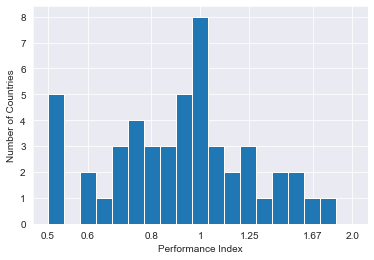

In [182]:
# plot a histogram of the distribution of performance indices for better analysis of the outliers
logbins = np.logspace(np.log10(0.5),np.log10(2),20)
plt.grid(True)
plt.hist(df_country_data.PERFORMANCE, bins = logbins);
plt.xscale('log');
plt.xticks([.5, .6, 0.8, 1, 1.25, 1.67, 2.0], [.5, .6, 0.8, 1, 1.25, 1.67, 2.0])
plt.xlabel('Performance Index');
plt.ylabel('Number of Countries');

In [183]:
# gather the list of the top 10 countries according to performance index
upper_countries = df_country_data.PERFORMANCE.sort_values(ascending = False).dropna().head(10).index
# gather the list of the bottom 10 countries according to performance index
lower_countries = df_country_data.PERFORMANCE.sort_values(ascending = True).dropna().head(10).index
# display the countries in each of the top 10 or bottom 10 of performance data
print("Countries with a high performance index: {}".format(', '.join(upper_countries.tolist())))
print("Countries with a low performance index: {}".format(', '.join(lower_countries.tolist())))

Countries with a high performance index: Vietnam, Turkey, Macao-China, Hong Kong-China, China-Shanghai, Chinese Taipei, Thailand, Singapore, Portugal, Poland
Countries with a low performance index: Qatar, Peru, Jordan, United Arab Emirates, Montenegro, Iceland, Sweden, Kazakhstan, Israel, Denmark


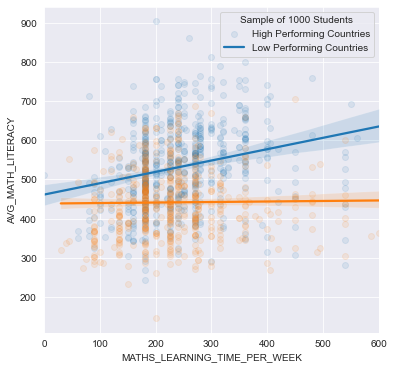

In [186]:
plt.figure(figsize = (6, 6))
# sample 1000 students from high performing countries, plot a linear regression of instructional minutes and academic performance
sb.regplot(data = df_clean[df_clean['COUNTRY'].isin(upper_countries)].sample(1000), x = columns['MMINS'], y = 'AVG_MATH_LITERACY', scatter_kws = {'alpha':0.1});
# sample 1000 students from low performing countries, plot a linear regression of instructional minutes and academic performance
sb.regplot(data = df_clean[df_clean['COUNTRY'].isin(lower_countries)].sample(1000), x = columns['MMINS'], y = 'AVG_MATH_LITERACY', scatter_kws = {'alpha':0.1});
plt.legend(['High Performing Countries','Low Performing Countries'], title = 'Sample of 1000 Students');
plt.xlim(0, 600);

Although a wide range of instructional minutes and academic performance are observed, there are two distinct trends for high and low performing countries. Although we had concluded from previuos analysis that more educational minutes does not mean better scores, it seems that high performing countries - which represent as outliers in social index vs scores chart- know how to make use of the classes.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. A better job yields in a higher soical status.
from previous analysis we know that (in most cases) higher soical index results in higher academic score. Thus, a better job (in most cases) results in better score. This is what we had observed in another analysis where we saw how parantal accupation positively correlates with scores.

2. The positive relationship between academic performance and parents' education level keeps holding in each educational levels.
This is in accordance with the overall result of investigating the performance regarding the education.

3. The positive relationship between academic performance and the family structure keeps holding in each structure alone.

### Were there any interesting or surprising interactions between features?

Preschooling is not only beneficial for children. This experience facilitates the process of learning even for adolscents. It seems to me that this steams from the human brain's need for getting acquainted with every process before seriously starting it.

Although we obsereved that learning times seem to be inefficient for most subjects, while deviding the dataset by countries and measuring the relationship again, we noticed that in some countries these instructional minutes are actually working so well. These were countries that considered to be outliers in status_index vs score plot.

## Conclusions
As a kid, born in Afghanistan and raised in Pakistan, I was told that the poorer you are, the better you could study. More problems mean more attention towards studies. However, I found that totally nonsense.  During our school studies we had access to nothing. No computers, phones, internets or any other material that would help us grow. This is one of the reasons why we still find ways to have slightly better lives.